Exploratory Data Analysis (EDA) for Mountain Fire Twin Otter data from CalFiDE 2022

In [1]:
import pandas as pd

# Load the dataset
file_path = 'norm_all_flights_merged_data.csv'
df = pd.read_csv(file_path)


Basic information and summary statistics: 

In [2]:
# Display basic information about the dataset
basic_info = df.info()

# Display the first few rows to understand the data's appearance
first_rows = df.head()

# Summary statistics for numerical variables
summary_stats = df.describe()

basic_info, first_rows, summary_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GPSLat           2799 non-null   float64
 1   GPSLon           2799 non-null   float64
 2   GPSAlt           2799 non-null   float64
 3   AmbTemp          1843 non-null   float64
 4   CO2_ppm_zscore   1196 non-null   float64
 5   CH4_ppb_zscore   1196 non-null   float64
 6   CO_ppb_zscore    1199 non-null   float64
 7   H2O_pct_zscore   1195 non-null   float64
 8   NO_ppbv_zscore   840 non-null    float64
 9   NO2_ppbv_zscore  840 non-null    float64
 10  NOy_ppbv_zscore  830 non-null    float64
 11  O3_ppbv_zscore   788 non-null    float64
 12  NOx_ppbv_zscore  840 non-null    float64
 13  Ox_ppbv_zscore   788 non-null    float64
dtypes: float64(14)
memory usage: 306.3 KB


(None,
    GPSLat   GPSLon  GPSAlt  AmbTemp  CO2_ppm_zscore  CH4_ppb_zscore  \
 0  38.555 -121.301   86.11      NaN        1.509045        1.900607   
 1  38.555 -121.301   96.87      NaN             NaN             NaN   
 2  38.555 -121.302  111.33      NaN        1.381030        1.962692   
 3  38.554 -121.302  114.14      NaN             NaN             NaN   
 4  38.554 -121.303  126.96      NaN        1.402114             NaN   
 
    CO_ppb_zscore  H2O_pct_zscore  NO_ppbv_zscore  NO2_ppbv_zscore  \
 0            NaN             NaN        0.041018         1.102858   
 1       2.103630             NaN       -1.391993         0.784866   
 2            NaN        1.500561       -1.128571        -0.600669   
 3       2.200679             NaN       -0.612266        -0.964088   
 4            NaN        1.525462        1.157924        -0.736951   
 
    NOy_ppbv_zscore  O3_ppbv_zscore  NOx_ppbv_zscore  Ox_ppbv_zscore  
 0        -0.583427        1.354559         0.630332        1.3697

In [3]:
print(df.columns)

Index(['GPSLat', 'GPSLon', 'GPSAlt', 'AmbTemp', 'CO2_ppm_zscore',
       'CH4_ppb_zscore', 'CO_ppb_zscore', 'H2O_pct_zscore', 'NO_ppbv_zscore',
       'NO2_ppbv_zscore', 'NOy_ppbv_zscore', 'O3_ppbv_zscore',
       'NOx_ppbv_zscore', 'Ox_ppbv_zscore'],
      dtype='object')


Distribution of Variables: 

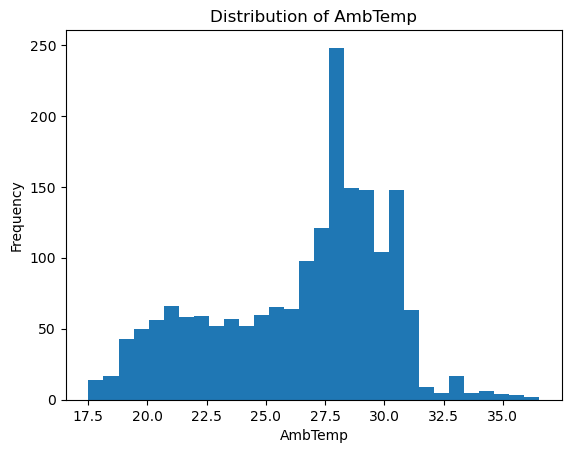

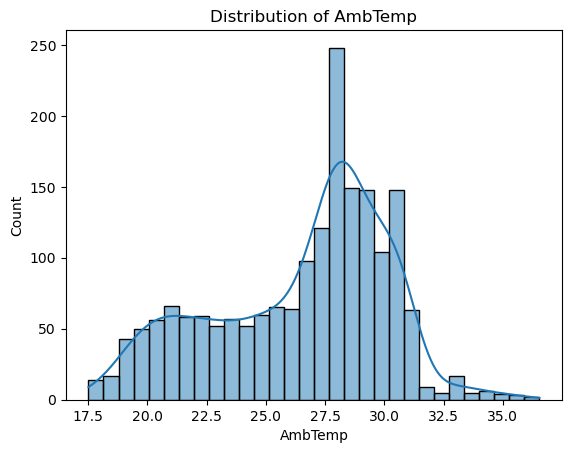

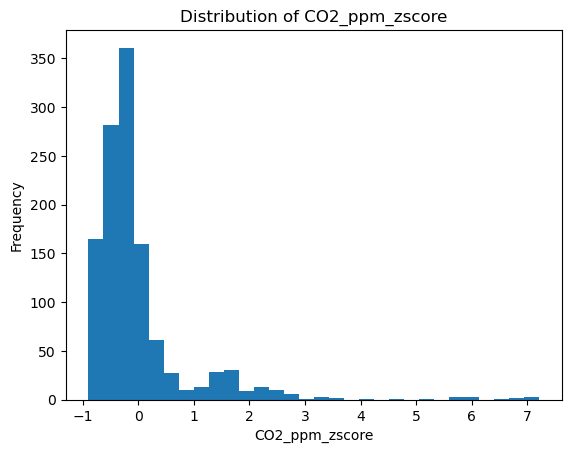

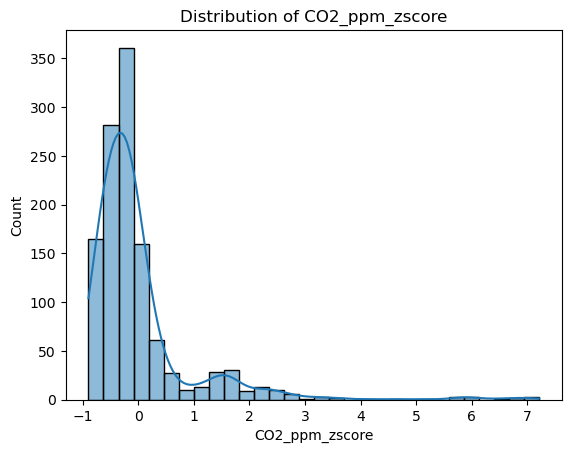

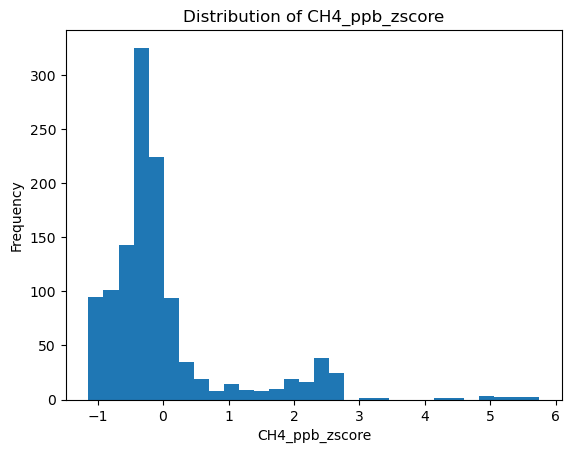

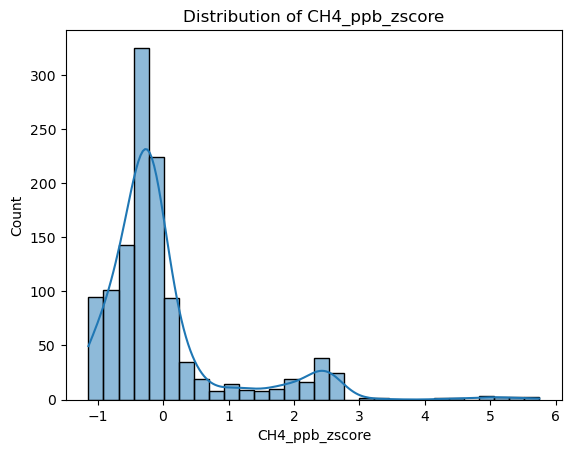

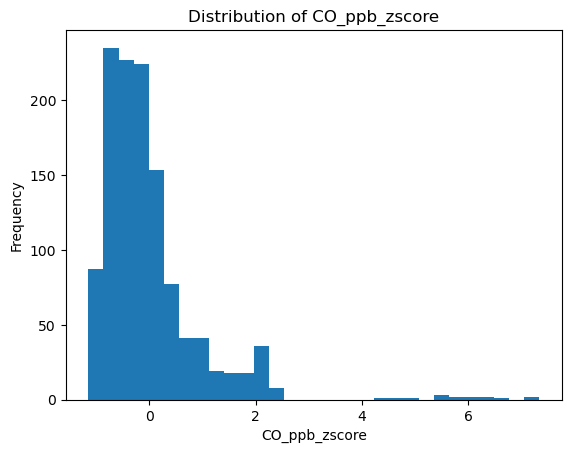

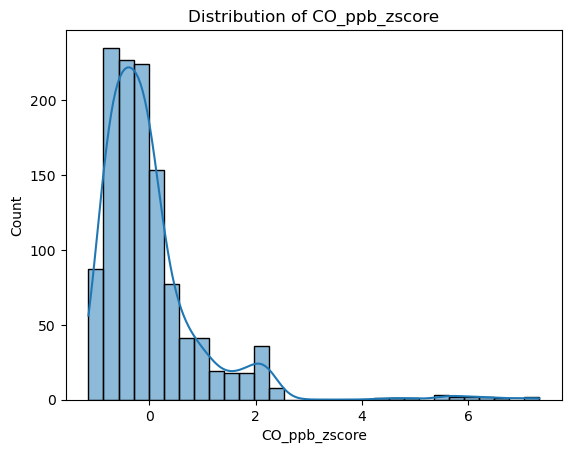

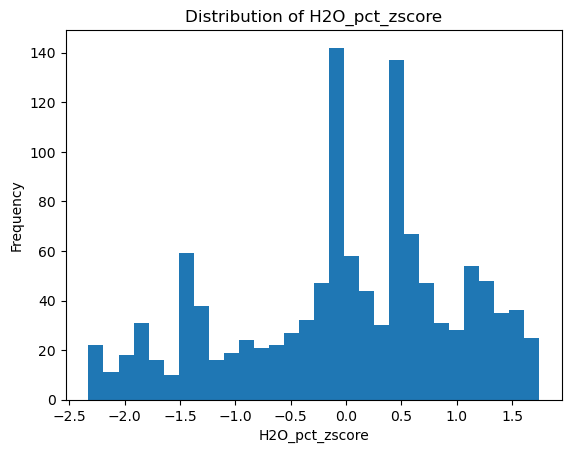

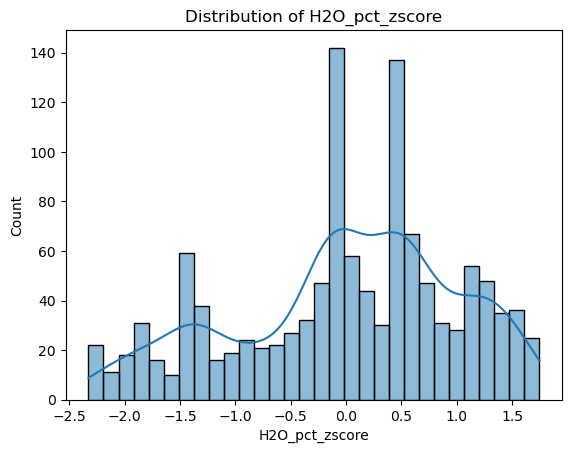

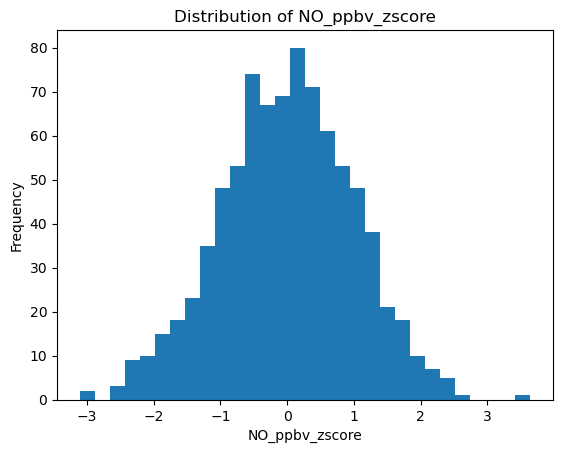

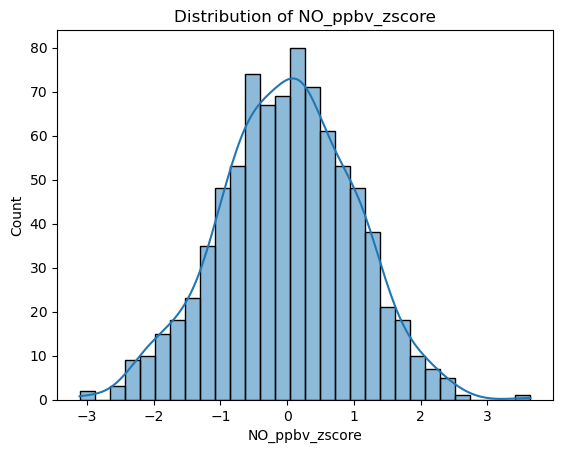

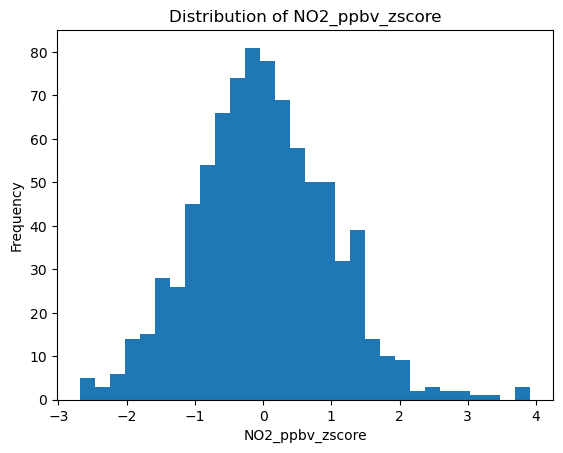

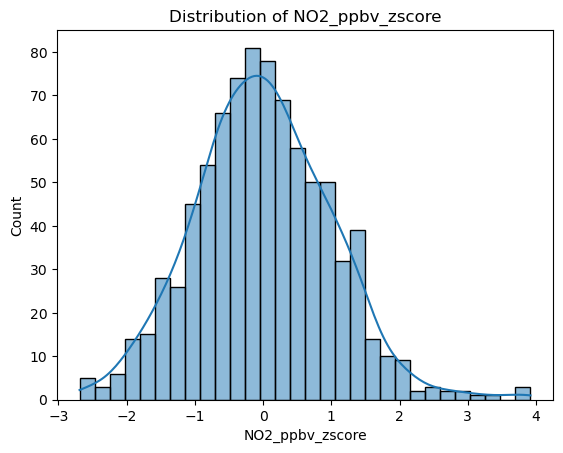

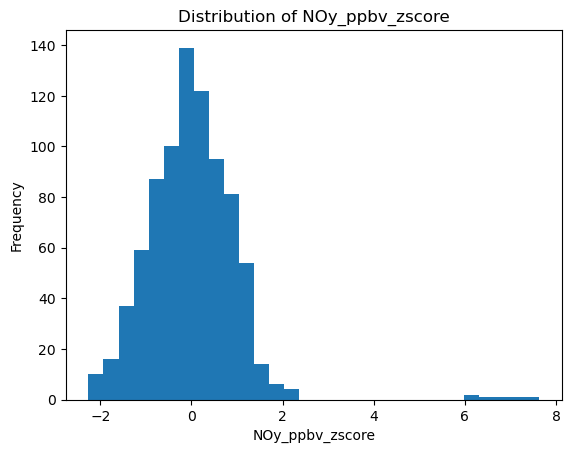

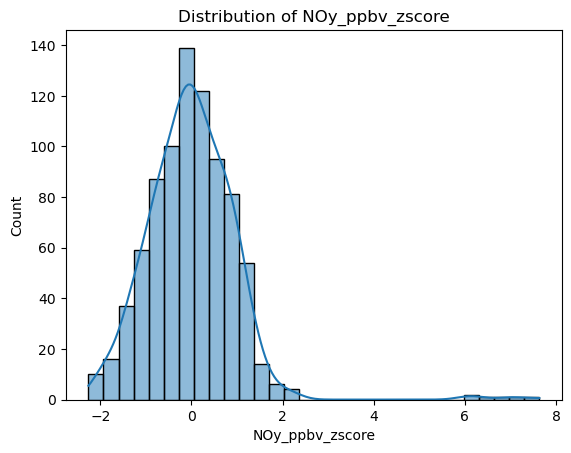

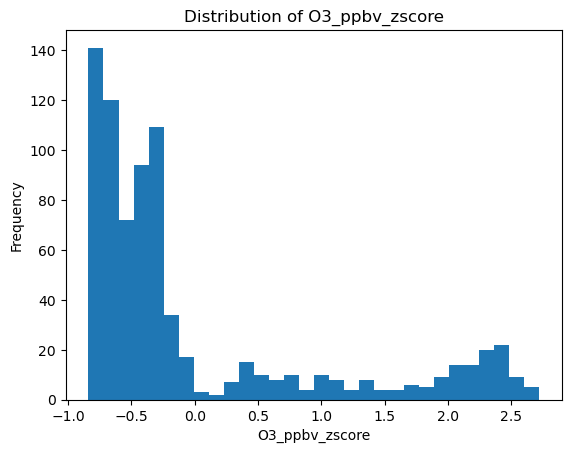

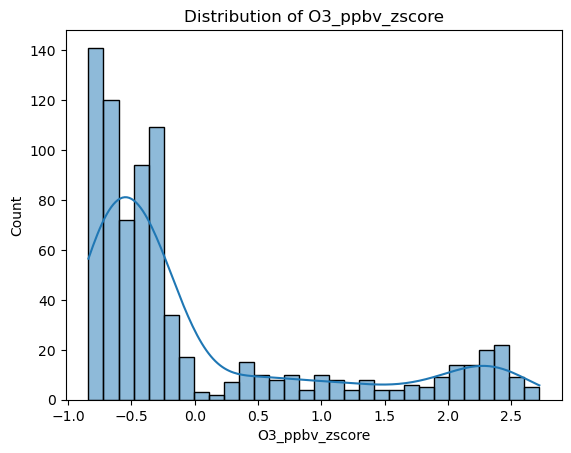

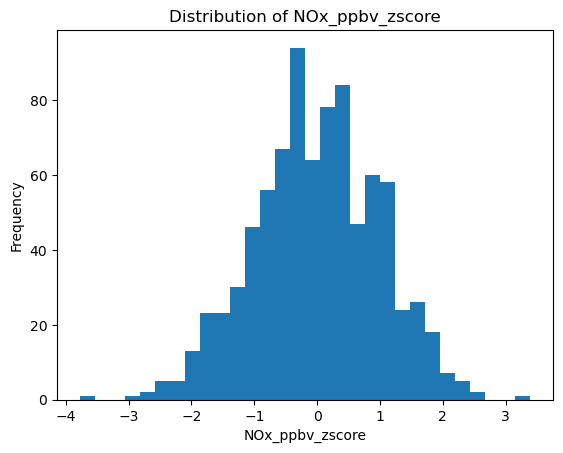

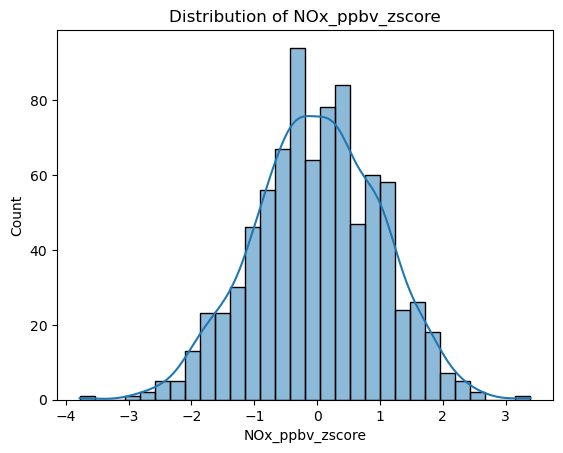

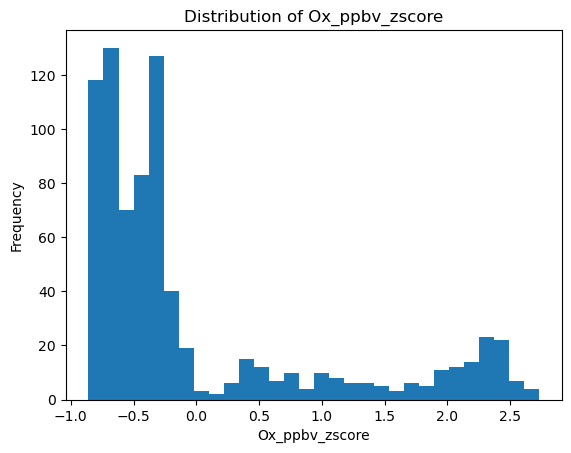

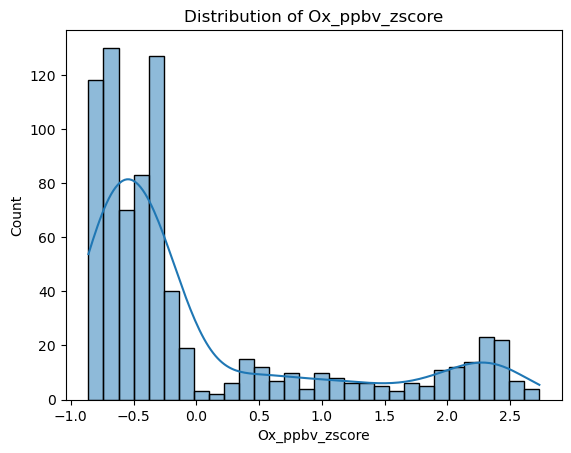

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variable names you're interested in analyzing
# Ensure these names match exactly with your DataFrame's column names
variables = [' jNO2_up', ' jNO2_down', ' jNO2_total', ' NO_ppbv',
       ' NO2_ppbv', ' NOy_ppbv', ' O3_ppbv', ' NOx_ppbv', ' Ox_ppbv',
       ' CO2_ppm', ' CO2_i_ppm', ' CH4_ppb', ' CH4_i_ppb', ' CO_ppb',
       ' CO_i_ppb', ' H2O_pct', ' H2O_i_pct', ' AmbTemp', ' RelHumidity',
       ' StaticPrs', ' VertWindSpd', ' WindDir', ' WindSpd', ' Heading',
       ' Pitch', ' Roll', ' TrueAirSpd']
variables = ['AmbTemp', 'CO2_ppm_zscore',
       'CH4_ppb_zscore', 'CO_ppb_zscore', 'H2O_pct_zscore', 'NO_ppbv_zscore',
       'NO2_ppbv_zscore', 'NOy_ppbv_zscore', 'O3_ppbv_zscore',
       'NOx_ppbv_zscore', 'Ox_ppbv_zscore']

for var in variables:
    # Check if the variable exists in the DataFrame to avoid KeyError
    if var in df.columns:
        # Using matplotlib
        plt.hist(df[var], bins=30)
        plt.title(f'Distribution of {var}')
        plt.xlabel(f'{var}')
        plt.ylabel('Frequency')
        plt.show()

        # Using seaborn for a nicer layout with Kernel Density Estimate (KDE)
        sns.histplot(df[var], bins=30, kde=True)
        plt.title(f'Distribution of {var}')
        plt.xlabel(f'{var}')
        plt.show()
    else:
        print(f'Column {var} not found in DataFrame.')


Explore Correlations: 

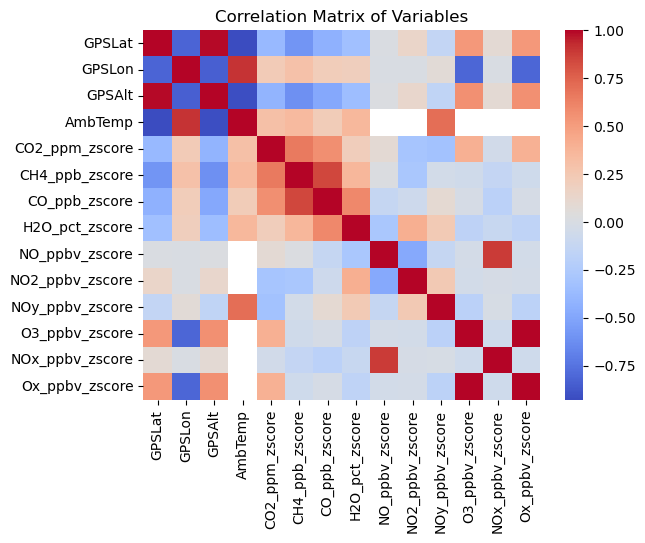

In [6]:

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()


Missing Data:

In [7]:
print(df.isnull().sum())


GPSLat                0
GPSLon                0
GPSAlt                0
AmbTemp             956
CO2_ppm_zscore     1603
CH4_ppb_zscore     1603
CO_ppb_zscore      1600
H2O_pct_zscore     1604
NO_ppbv_zscore     1959
NO2_ppbv_zscore    1959
NOy_ppbv_zscore    1969
O3_ppbv_zscore     2011
NOx_ppbv_zscore    1959
Ox_ppbv_zscore     2011
dtype: int64
